In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

plt.rcParams["figure.figsize"] = (10,8)

In [19]:
infile = open("qcd_100000_pt_1000_1200.pkl",'rb')
bkg = pickle.load(infile)
infile = open("higgs_100000_pt_1000_1200.pkl",'rb')
signal = pickle.load(infile)

n_qcd = 2000
n_higgs = 50

bkg_weight = 1
signal_weight = n_higgs/n_qcd
weights=[[bkg_weight for i in range(len(bkg))], [signal_weight for i in range(len(signal))]]

### 1.

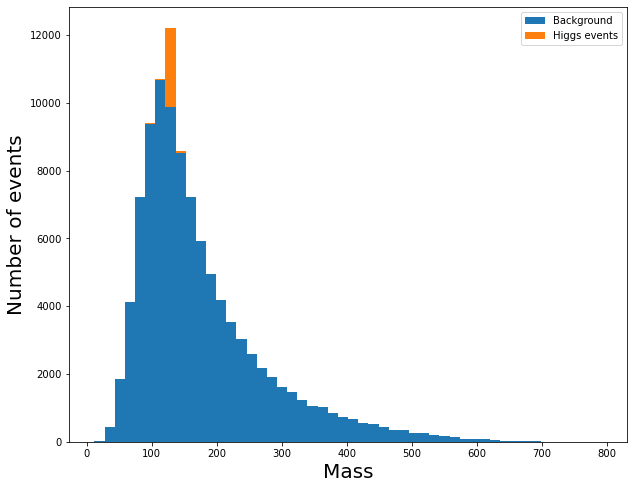

In [20]:
n, bins, patches = plt.hist([bkg['mass'], signal['mass']],
         stacked=True, 
         weights=weights,
         bins=50,
         label=['Background', 'Higgs events'],
         #density=True
        )
plt.xlabel('Mass', fontsize=20)
plt.ylabel('Number of events', fontsize=20)
plt.legend()
plt.show()

In [4]:
p = stats.poisson.sf(n_higgs+n_qcd, mu=n_qcd)
p

0.12961287455491954

In [5]:
print(f'The significance is {stats.norm.isf(p):0.3f} sigma')
print(f'The N_higgs/sqrt(N_qcd) approximation is {n_higgs/np.sqrt(n_qcd):0.3f} sigma')

The significance is 1.128 sigma
The N_higgs/sqrt(N_qcd) approximation is 1.118 sigma


### 2.

To find the best cut, we will cut at various mass values above and below the mean Higgs mass.

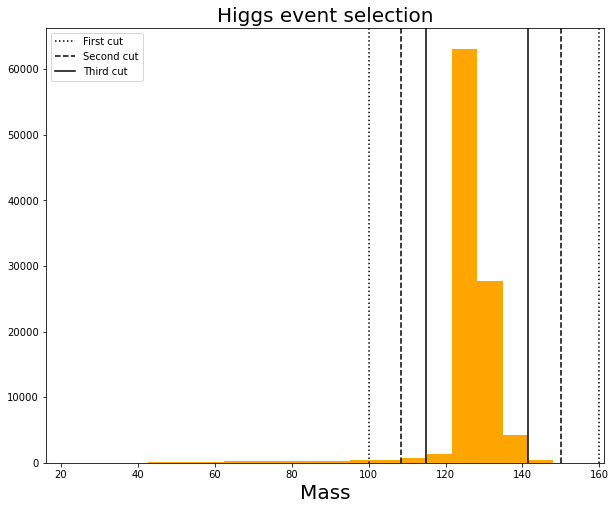

In [6]:
plt.hist(signal['mass'], bins=20, color='orange')
plt.axvline(100, linestyle=':', c='k', label='First cut')
plt.axvline(160, linestyle=':', c='k')
plt.axvline(108.5, linestyle='--', c='k', label='Second cut')
plt.axvline(150, linestyle='--', c='k')
plt.axvline(115, linestyle='-', c='k', label='Third cut')
plt.axvline(141.5, linestyle='-', c='k')
plt.title('Higgs event selection', fontsize=20)
plt.xlabel('Mass', fontsize=20)
plt.legend()
plt.show()

We apply these cuts to the signal and background

In [22]:
signal_cuts = [0,0,0]
signal_cuts[0] = signal[(signal['mass'] <= 160) & (signal['mass'] >= 100)]
signal_cuts[1] = signal[(signal['mass'] <= 150) & (signal['mass'] >= 108.5)]
signal_cuts[2] = signal[(signal['mass'] <= 141.5) & (signal['mass'] >= 115)]

bkg_cuts = [0,0,0]
bkg_cuts[0] = bkg[(bkg['mass'] <= 160) & (bkg['mass'] >= 100)]
bkg_cuts[1] = bkg[(bkg['mass'] <= 150) & (bkg['mass'] >= 108.5)]
bkg_cuts[2] = bkg[(bkg['mass'] <= 141.5) & (bkg['mass'] >= 115)]

In [23]:
signal_norms = [0,0,0]
bkg_norms = [0,0,0]
for i in range(3):
    signal_norms[i] = len(signal_cuts[i]) * n_higgs/len(bkg)
    bkg_norms[i] = len(bkg_cuts[i]) * n_qcd/len(bkg)

In [24]:
print(f'For the first cuts, n_higgs = {signal_norms[0]} and n_qcd = {bkg_norms[0]}.')
p = stats.poisson.sf(signal_norms[0]+bkg_norms[0], mu=bkg_norms[0])
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')
print('')

print(f'For the second cuts, n_higgs = {signal_norms[1]} and n_qcd = {bkg_norms[1]}.')
p = stats.poisson.sf(signal_norms[1]+bkg_norms[1], mu=bkg_norms[1])
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')
print('')

print(f'For the third cuts, n_higgs = {signal_norms[2]} and n_qcd = {bkg_norms[2]}.')
p = stats.poisson.sf(signal_norms[2]+bkg_norms[2], mu=bkg_norms[2])
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')

For the first cuts, n_higgs = 49.0285 and n_qcd = 724.18.
This gives us a significance of 1.819 sigma.

For the second cuts, n_higgs = 48.742 and n_qcd = 518.58.
This gives us a significance of 2.123 sigma.

For the third cuts, n_higgs = 48.2205 and n_qcd = 337.6.
This gives us a significance of 2.558 sigma.


### 3.

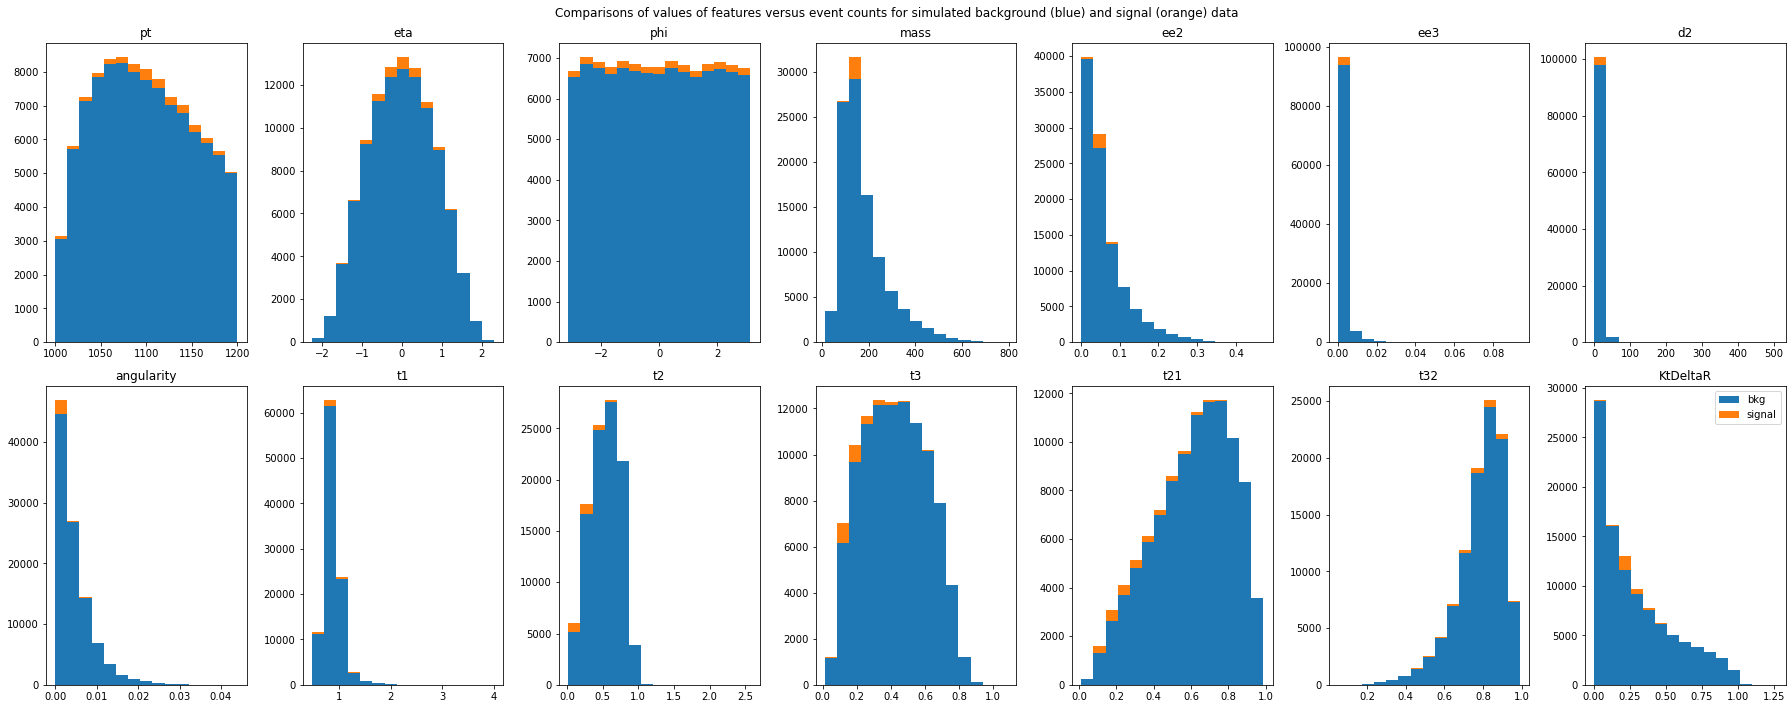

In [96]:
fig, ax = plt.subplots(2,7,figsize=(25,10))

for i in range(0,7):
    j = i+7
    column1 = bkg.columns[i]
    column2 = bkg.columns[j]
    ax[0,i].hist([bkg[column1],signal[column1]], label=['bkg', 'signal'], stacked=True, weights=weights, bins=15)
    ax[1,i].hist([bkg[column2],signal[column2]], label=['bkg', 'signal'], stacked=True, weights=weights, bins=15)
    ax[0,i].set_title(column1)
    ax[1,i].set_title(column2)
plt.suptitle('Comparisons of values of features versus event counts for simulated background (blue) and signal (orange) data')
plt.legend()
plt.tight_layout()

Mass appears to be the best discriminator, as the distribution of signal is much more narrow than the background. From these, we can see that pt, phi, d2, and t32 are probably not the best features to select on, as the signal and background are similarly distributed across them.

Now, we'll start with the best mass cut and see if we can improve it by cutting along another feature.

In [36]:
print(f'With cutting all mass >141.5 and <115, n_higgs = {signal_norms[2]} and n_qcd = {bkg_norms[2]}.')
p = stats.poisson.sf(signal_norms[2]+bkg_norms[2], mu=bkg_norms[2])
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')

With cutting all mass >141.5 and <115, n_higgs = 48.2205 and n_qcd = 337.6.
This gives us a significance of 2.558 sigma.


We'll cut along eta. It appears that there is very little signal beyond +-1.5.

In [34]:
signal_mass = signal_cuts[2]
bkg_mass = bkg_cuts[2]

signal_eta = signal_mass[(signal_mass['eta'] <=1.5) & (signal_mass['eta'] >=-1.5)]
bkg_eta = bkg_mass[(bkg_mass['eta'] <=1.5) & (bkg_mass['eta'] >=-1.5)]

sig_eta_norm = len(signal_eta) * n_higgs/len(bkg)
bkg_eta_norm = len(bkg_eta) * n_qcd/len(bkg)

In [38]:
print(f'Adding a eta cut of <-1.5 and >1.5, n_higgs = {sig_eta_norm} and n_qcd = {bkg_eta_norm}.')
p = stats.poisson.sf(sig_eta_norm+bkg_eta_norm, mu=bkg_eta_norm)
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')

Adding a eta cut of <-1.5 and >1.5, n_higgs = 48.091 and n_qcd = 318.0.
This gives us a significance of 2.664 sigma.


This has improved our significance, but only by a small amount.


### 4.
Next, we'll continue cutting on other features. First, based on ee2, where it looks like all of the signal is below 0.08.

In [92]:
signal_ee2 = signal_eta[signal_eta['ee2'] <=0.075]
bkg_ee2 = bkg_eta[bkg_eta['ee2'] <=0.075]

sig_ee2_norm = len(signal_ee2) * n_higgs/len(bkg)
bkg_ee2_norm = len(bkg_ee2) * n_qcd/len(bkg)

In [93]:
print(f'Adding a ee2 cut of >0.1, n_higgs = {sig_ee2_norm} and n_qcd = {bkg_ee2_norm}.')
p = stats.poisson.sf(sig_ee2_norm+bkg_ee2_norm, mu=bkg_ee2_norm)
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')

Adding a ee2 cut of >0.1, n_higgs = 48.089 and n_qcd = 318.0.
This gives us a significance of 2.664 sigma.


This didn't seem to make any change to the significance. ee2 might be related to mass or eta, so cutting along those might have already eliminated all of the values with ee2 >0.1.
Next we'll try angularity, where all of the signal appears to be below 0.005.

In [94]:
signal_ang = signal_ee2[signal_ee2['angularity'] <= 0.005]
bkg_ang = bkg_ee2[bkg_ee2['angularity'] <= 0.005]

sig_ang_norm = len(signal_ang) * n_higgs/len(bkg)
bkg_ang_norm = len(bkg_ang) * n_qcd/len(bkg)

In [56]:
print(f'Adding an angularity cut of >0.005, n_higgs = {sig_ang_norm} and n_qcd = {bkg_ang_norm}.')
p = stats.poisson.sf(sig_ang_norm+bkg_ang_norm, mu=bkg_ang_norm)
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')

Adding an angularity cut of >0.005 = 47.0655 and n_qcd = 219.8.
This gives us a significance of 3.058 sigma.


Next, we'll cut on t1, where it appears that the signal is limited to around 0.5 to 1.5.

In [59]:
signal_t1 = signal_ang[(signal_ang['t1'] <= 1.5) & (signal_ang['t1'] >= 0.5)]
bkg_t1 = bkg_ang[(bkg_ang['t1'] <= 1.5) & (bkg_ang['t1'] >= 0.5)]

sig_t1_norm = len(signal_t1) * n_higgs/len(bkg)
bkg_t1_norm = len(bkg_t1) * n_qcd/len(bkg)

In [60]:
print(f'Adding a t1 cut to between 0.5 and 1.5, n_higgs = {sig_t1_norm} and n_qcd = {bkg_t1_norm}.')
p = stats.poisson.sf(sig_t1_norm+bkg_t1_norm, mu=bkg_t1_norm)
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')

Adding a t1 cut to between 0.5 and 1.5, n_higgs = 46.0175 and n_qcd = 218.3.
This gives us a significance of 3.036 sigma.


This reduced our significance, so we won't include it and move on to t2. It appears that signal is limited to around 0.75 for t2.

In [79]:
signal_t2 = signal_ang[(signal_ang['t2'] <= 0.6)]
bkg_t2 = bkg_ang[(bkg_ang['t2'] <= 0.6)]

sig_t2_norm = len(signal_t2) * n_higgs/len(bkg)
bkg_t2_norm = len(bkg_t2) * n_qcd/len(bkg)

In [80]:
print(f'Adding a t1 cut to between 0.5 and 1.5, n_higgs = {sig_t2_norm} and n_qcd = {bkg_t2_norm}.')
p = stats.poisson.sf(sig_t2_norm+bkg_t2_norm, mu=bkg_t2_norm)
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')

Adding a t1 cut to between 0.5 and 1.5, n_higgs = 45.26 and n_qcd = 114.72.
This gives us a significance of 3.960 sigma.


In [81]:
signal_t3 = signal_t2[(signal_t2['t3'] <= 0.5)]
bkg_t3 = bkg_t2[(bkg_t2['t3'] <= 0.5)]

sig_t3_norm = len(signal_t3) * n_higgs/len(bkg)
bkg_t3_norm = len(bkg_t3) * n_qcd/len(bkg)

In [82]:
print(f'Adding a t3 cut of >0.5, n_higgs = {sig_t3_norm} and n_qcd = {bkg_t3_norm}.')
p = stats.poisson.sf(sig_t3_norm+bkg_t3_norm, mu=bkg_t3_norm)
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')

Adding a t3 cut of >0.5, n_higgs = 45.2195 and n_qcd = 105.82.
This gives us a significance of 4.183 sigma.


In [83]:
signal_t21 = signal_t3[(signal_t3['t21'] <= 0.65)]
bkg_t21 = bkg_t3[(bkg_t3['t21'] <= 0.65)]

sig_t21_norm = len(signal_t21) * n_higgs/len(bkg)
bkg_t21_norm = len(bkg_t21) * n_qcd/len(bkg)
print(f'Adding a t21 cut of >0.68, n_higgs = {sig_t21_norm} and n_qcd = {bkg_t21_norm}.')
p = stats.poisson.sf(sig_t21_norm+bkg_t21_norm, mu=bkg_t21_norm)
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')

Adding a t21 cut of >0.68, n_higgs = 44.5585 and n_qcd = 82.94.
This gives us a significance of 4.548 sigma.


In [84]:
signal_KtDeltaR = signal_t21[(signal_t21['KtDeltaR'] <= 0.375) & (signal_t21['KtDeltaR'] >= 0.125)]
bkg_KtDeltaR = bkg_t21[(bkg_t21['KtDeltaR'] <= 0.375) & (bkg_t21['KtDeltaR'] >= 0.125)]

sig_KtDeltaR_norm = len(signal_t21) * n_higgs/len(bkg)
bkg_KtDeltaR_norm = len(bkg_t21) * n_qcd/len(bkg)
print(f'Adding a t21 cut of >0.68, n_higgs = {sig_KtDeltaR_norm} and n_qcd = {bkg_KtDeltaR_norm}.')
p = stats.poisson.sf(sig_KtDeltaR_norm+bkg_KtDeltaR_norm, mu=bkg_KtDeltaR_norm)
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')

Adding a t21 cut of >0.68, n_higgs = 44.5585 and n_qcd = 82.94.
This gives us a significance of 4.548 sigma.


Just like with ee2, this doesn't appear to have any affect on the significance.

This seems to be about the best significance we can get. Cutting further based on any of the features only seems to decrease the significance.